In [ ]:
#Importamos las librerias
import pandas as pd #procesamiento de datos
import numpy as np #algebra lineal
import io
import seaborn as sns #graficos avanzados
import matplotlib.pyplot as plt #graficos basicos

In [ ]:
#Carga de datos en Google Colab
from google.colab import files
 
uploaded = files.upload()


Saving test.parquet to test (1).parquet


In [ ]:
#Carga de datos en DataFrame
train = pd.read_parquet(io.BytesIO(uploaded['train.parquet']))
test = pd.read_parquet(io.BytesIO(uploaded['test.parquet']))

In [ ]:
#Verificar si 'tren.parquet': Contiene 346479 registros y 22 dimensiones,
train.shape

(346479, 22)

#Idenficar el variable objetivo del modelo: 
El objetivo es predecir si una propiedad pertenece a la categoría de precios bajos (low). 
para luego hacer un analisis exploratorio de datos.


In [ ]:
#Ver duplicados
train[train.duplicated()==True]

#Eliminar la filas duplicadas
train.drop_duplicates()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,7050982281,https://evansville.craigslist.org/apa/d/evansv...,evansville,https://evansville.craigslist.org,672,apartment,660,1,1.0,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00x0x_9oaHKZ8Ilp...,"The pool, the office, the 24-hour on-site laun...",37.9591,-87.5293,in
346475,7049418251,https://sandiego.craigslist.org/ssd/apa/d/chul...,san diego,https://sandiego.craigslist.org,2122,apartment,1099,2,2.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00O0O_6QsU4p5WMh...,Seize your chance to live in our beautiful apa...,32.6279,-117.0370,ca
346476,7048268235,https://columbia.craigslist.org/apa/d/columbia...,columbia,https://columbia.craigslist.org,1014,apartment,1104,2,2.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_dpNWqzYhGK...,Tucked into the rolling landscape of Southeast...,33.9659,-80.9355,sc
346477,7026721229,https://nd.craigslist.org/apa/d/minot-open-con...,north dakota,https://nd.craigslist.org,935,apartment,1050,2,2.0,0,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00Z0Z_65g6Cty1RX...,Enjoy living at Southwood Apartments! Located ...,48.1995,-101.2800,nd


In [ ]:
#revisar la cantidad de valores nulos
#train.isnull().sum() 
train.isna().sum() #contar los valores nulos

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

In [ ]:
#Oservamos algunos valores
train.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [ ]:
#para saber cuantos valores del precio son igual a cero
#train[train['price']==0].count()
(train['price'] == 0).sum()

1175

In [ ]:
#Eliminamos esos los valores que son igual a cero del precio
train = train[train['price'] != 0]

In [ ]:
#Verificar si se eliminaron
train.shape

(345304, 22)

Crear la columna `category_price`, en la cual se consideran las categorías
   
  * 'low': Para precios entre 0 y 999 dólares (debe tomar valor 1 en el archivo con las predicciones).
  * 'medium': Para precios entre 1000 y 1999 dólares (debe tomar valor 0 en el archivo con las predicciones).
  * 'high': Para precios desde 2000 dólares en adelante (debe tomar valor 0 en el archivo con las predicciones). 
​

Considerando esta categorización, el objetivo es predecir si una propiedad pertenece a la categoría de precios bajos (low).
​

In [ ]:
#Creamos un columna tomando el valor de 1 y 0 
train["category_price"] = train['price'].where(train['price'] >= 1000, 1).where(train['price'] < 1000, 0)

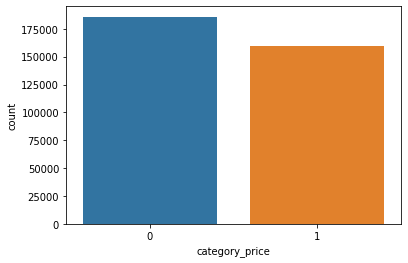

In [ ]:
# Graficamos la distribución de la nueva columna
sns.countplot(x='category_price', data=train)

In [ ]:
train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,0
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,0
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,0
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,0
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,1


El dataset tiene descripciones repetidas, que generalmente tienen el mismo precio de alquiler y la misma URL de la imagen de la propiedad. Por lo tanto, se decidió eliminar estos registros repetidos utilizando la columna de la URL de la imagen como referencia para determinar si se trata de la misma propiedad en alquiler. Además, se incorporó una columna con la cantidad de veces que se publicó el aviso, ya que se consideró que esto puede ser un indicativo del valor de su alquiler.

In [ ]:
# Contamos la cantidad de valores repetidos en la columna "image_url"
len(train['image_url'])-len(train['image_url'].drop_duplicates())

177651

In [ ]:
#Ver duplicados
len(train[train['image_url'].duplicated()==True])

177651

In [ ]:
#borrar duplicados
len(train['image_url'].drop_duplicates())

167653

In [ ]:
train.shape

(345304, 23)

Este script busca y elimina los valores duplicados de la columna "image_url" en el dataframe "train" y devuelve una lista de índices donde se encuentran los valores duplicados. Utiliza el método "loc", "groupby" y una función lambda para llevar a cabo esta tarea.

In [ ]:
df = train.loc[train['image_url'].duplicated(keep=False),'image_url']
df = df.groupby(df).apply(lambda x: tuple(x.index)).tolist()
df[32] #accede al índice 32 de esa lista.

(34967, 38330, 100838, 136641, 242593, 278640, 286345, 289896, 330349)

In [ ]:
#Del indice 32 Comparamos para ver que tienen el mismo valor 'image_url'
train.loc[[34967, 38330, 100838, 136641, 242593, 278640, 286345, 289896, 330349],['price','image_url','description']]

,price,image_url,description
34967,686,https://images.craigslist.org/00000_2BC2tlv2e2...,Penbrooke Place\t Prope...
38330,895,https://images.craigslist.org/00000_2BC2tlv2e2...,Winter is coming! Fountainhead apartments can ...
100838,895,https://images.craigslist.org/00000_2BC2tlv2e2...,Winter is coming! Fountainhead apartments can ...
136641,895,https://images.craigslist.org/00000_2BC2tlv2e2...,Winter is coming! Fountainhead apartments can ...
242593,895,https://images.craigslist.org/00000_2BC2tlv2e2...,Winter is coming! Fountainhead apartments can ...
278640,895,https://images.craigslist.org/00000_2BC2tlv2e2...,Winter is coming! Fountainhead apartments can ...
286345,895,https://images.craigslist.org/00000_2BC2tlv2e2...,Winter is coming! Fountainhead apartments can ...
289896,780,https://images.craigslist.org/00000_2BC2tlv2e2...,Penbrooke Place\t Prope...
330349,895,https://images.craigslist.org/00000_2BC2tlv2e2...,Winter is coming! Fountainhead apartments can ...


Este script utiliza el método "groupby" para agrupar los valores de la columna 'image_url' en el dataframe "train" y contar cuántas veces aparece cada valor. El resultado es una nueva columna llamada "publicaciones" con el número de veces que aparece cada valor en la columna "image_url" del dataframe "train"

In [ ]:
train['publicaciones'] = train.groupby(['image_url'])['image_url'].transform('count')
test['publicaciones'] = test.groupby(['image_url'])['image_url'].transform('count')
train

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price,publicaciones
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,0,1
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,0,2
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,0,1
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,0,1
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,7050982281,https://evansville.craigslist.org/apa/d/evansv...,evansville,https://evansville.craigslist.org,672,apartment,660,1,1.0,1,...,0,laundry on site,None,https://images.craigslist.org/00x0x_9oaHKZ8Ilp...,"The pool, the office, the 24-hour on-site laun...",37.9591,-87.5293,in,1,2
346475,7049418251,https://sandiego.craigslist.org/ssd/apa/d/chul...,san diego,https://sandiego.craigslist.org,2122,apartment,1099,2,2.0,1,...,0,w/d in unit,off-street parking,https://images.craigslist.org/00O0O_6QsU4p5WMh...,Seize your chance to live in our beautiful apa...,32.6279,-117.0370,ca,0,1
346476,7048268235,https://columbia.craigslist.org/apa/d/columbia...,columbia,https://columbia.craigslist.org,1014,apartment,1104,2,2.0,1,...,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_dpNWqzYhGK...,Tucked into the rolling landscape of Southeast...,33.9659,-80.9355,sc,0,7
346477,7026721229,https://nd.craigslist.org/apa/d/minot-open-con...,north dakota,https://nd.craigslist.org,935,apartment,1050,2,2.0,0,...,0,w/d in unit,detached garage,https://images.craigslist.org/00Z0Z_65g6Cty1RX...,Enjoy living at Southwood Apartments! Located ...,48.1995,-101.2800,nd,1,21


In [ ]:
# Ahora si eliminamos los 'image_url' duplicados
train.drop_duplicates(subset='image_url', inplace=True)

In [ ]:
train.shape

(167653, 24)

Reducidomos el dataset en un 51,4% del total de registros originales

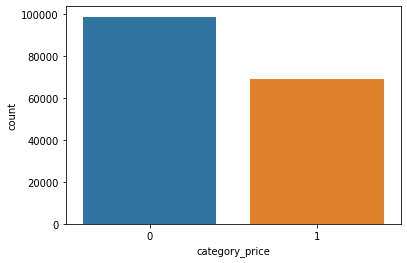

In [ ]:
# Volvemos a revisar la distribución del target
sns.countplot(x='category_price', data=train)

In [ ]:
train.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,category_price,publicaciones
count,1.676530e+05,1.676530e+05,1.676530e+05,167653.000000,167653.000000,167653.000000,167653.000000,167653.000000,167653.000000,167653.000000,167653.000000,166741.000000,166741.000000,167653.000000,167653.000000
mean,7.041582e+09,1.829952e+04,1.130363e+03,1.984528,1.493549,0.677954,0.657125,0.679206,0.080708,0.016677,0.056665,37.689079,-94.288160,0.412030,2.059635
std,9.130365e+06,6.761322e+06,2.144519e+04,4.467664,0.647880,0.467262,0.474672,0.466783,0.272388,0.128060,0.231201,5.832061,17.417899,0.492202,4.014569
min,7.004042e+09,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000,0.000000,1.000000
25%,7.036552e+09,8.490000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.737700,-105.117000,0.000000,1.000000
50%,7.044527e+09,1.100000e+03,9.600000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.254700,-89.258400,0.000000,1.000000
75%,7.049007e+09,1.500000e+03,1.200000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.685000,-81.257700,1.000000,2.000000
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000,1.000000,363.000000


Notamos la existencia de outliers en varias columnas, por ejemplo, un valor máximo de 1.100 camas o 75 baños. Analizaremos a continuación cada una de las columnas

In [ ]:
#Analizemos "sqfeet" en busqueda de outliers
train.sort_values("sqfeet",ascending=False)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price,publicaciones
249237,7017516227,https://mankato.craigslist.org/apa/d/new-ulm-2...,mankato,https://mankato.craigslist.org,750,apartment,8388607,2,1.0,0,...,0,laundry in bldg,detached garage,https://images.craigslist.org/00w0w_nq1l2oBn6W...,"Description 2-bedroom, 1-bath unit with smal...",44.3262,-94.4804,mn,1,1
141803,7046432288,https://santabarbara.craigslist.org/apa/d/sant...,santa barbara,https://santabarbara.craigslist.org,11350,house,1019856,5,4.0,1,...,1,laundry in bldg,attached garage,https://images.craigslist.org/00m0m_a6iuP3382d...,Stunning Ocean View and Gated Luxury Home with...,34.4478,-119.7030,ca,0,1
47651,7046395842,https://santabarbara.craigslist.org/apa/d/sant...,santa barbara,https://santabarbara.craigslist.org,7250,house,1019856,4,2.0,1,...,1,laundry in bldg,attached garage,https://images.craigslist.org/00k0k_lqGX8GjJBg...,WALK EVERYWHERE IN SANTA BARBARA! Wonderfully ...,34.4308,-119.7020,ca,0,1
241443,7046343123,https://syracuse.craigslist.org/apa/d/syracuse...,syracuse,https://syracuse.craigslist.org,625,duplex,999999,1,1.0,0,...,0,None,off-street parking,https://images.craigslist.org/00F0F_bmaTZRhAVn...,"Rowland St Street | Apt 2 | Syracuse, NY 13204...",43.0444,-76.1758,ny,1,1
41478,7048286226,https://newlondon.craigslist.org/apa/d/new-lon...,eastern CT,https://newlondon.craigslist.org,750,apartment,999999,1,1.0,0,...,0,laundry in bldg,off-street parking,https://images.craigslist.org/00H0H_3MbpR6z8x0...,"Various one bedroom apartments All remodeled, ...",41.3507,-72.1062,ct,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124652,7039526517,https://boston.craigslist.org/gbs/apa/d/watert...,boston,https://boston.craigslist.org,2500,apartment,0,2,2.5,0,...,0,w/d in unit,street parking,https://images.craigslist.org/00l0l_jUWnSxUubm...,"NO BROKER FEE! 1. *Available- January 1st, 20...",42.3677,-71.1879,ma,0,1
142634,7049105318,https://nashville.craigslist.org/apa/d/nashvil...,nashville,https://nashville.craigslist.org,1040,apartment,0,2,1.0,1,...,0,laundry on site,None,https://images.craigslist.org/00R0R_kFU3kboYnd...,POP IN FOR OUR OPEN HOUSE !!! COME AND TAKE A ...,36.0725,-86.7240,tn,0,2
197290,7031904235,https://honolulu.craigslist.org/oah/apa/d/hono...,hawaii,https://honolulu.craigslist.org,1995,cottage/cabin,0,2,1.0,0,...,0,None,None,https://images.craigslist.org/00U0U_ddIcqmk764...,Remodeled Two Bedrooms/One Bath/One Parking Gr...,21.2735,-157.8060,hi,0,1
99563,7039387979,https://lakeland.craigslist.org/apa/d/huge-lak...,lakeland,https://lakeland.craigslist.org,1200,manufactured,0,3,2.0,1,...,0,w/d hookups,off-street parking,https://images.craigslist.org/00l0l_fMNR7R9BLc...,*LARGE 3BR/2BA DOUBLE WIDE MOBILE HOME LAKLEAN...,NaN,NaN,fl,0,1


Se analiza la columna de square feet en un dataset de viviendas en alquiler en Estados Unidos y se consideran como errores los valores superiores a 50.000 y valores muy bajos, ya que no se ajustan al promedio encontrado en artículos de referencia. Se utilizará el método del Rango Intercuartílico para calcular los outliers.

La función comienza ordenando los valores de la columna de datos (datacolumn) utilizando el método "sorted".
Luego, utiliza la función "percentile" de numpy para calcular el primer y tercer cuartil (Q1 y Q3) de la columna de datos.
El rango intercuartil (IQR) se calcula restando Q1-Q3.
Luego, se calcula el rango inferior (lower_range) y el rango superior (upper_range) utilizando los valores de IQR y multiplicando por 1.5.
La función finalmente devuelve los valores de lower_range y upper_range.

In [ ]:
#Definimos una función para detectar outliers(valores atipicos)
def outlier_treatment(datacolumn):
    sorted(datacolumn) 
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [ ]:
# Obtenemos los valores límites inferior y superior
lowerbound,upperbound = outlier_treatment(train.sqfeet)
print ("Lower:",lowerbound," ","Upper",upperbound)

Lower: 75.0   Upper 1875.0


In [ ]:
#Obtenemos algunos ejemplos de outliers
train[(train.sqfeet < lowerbound) | (train.sqfeet > upperbound)]

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price,publicaciones
33,7032658920,https://prescott.craigslist.org/apa/d/prescott...,prescott,https://prescott.craigslist.org,2500,house,3622,3,2.0,1,...,0,w/d in unit,attached garage,https://images.craigslist.org/00D0D_6FAXLgugIp...,Ranch at Prescott home backs to the Prescott N...,34.4958,-112.3780,az,0,1
42,7043485903,https://albany.craigslist.org/apa/d/albany-roo...,albany,https://albany.craigslist.org,2975,apartment,1946,2,2.0,1,...,0,w/d in unit,detached garage,https://images.craigslist.org/00a0a_5p2eIdMlBN...,"***If you are inquiring by email, please inclu...",42.6362,-73.7545,ny,0,2
48,7024919810,https://treasure.craigslist.org/apa/d/port-sai...,treasure coast,https://treasure.craigslist.org,1750,house,2424,3,2.0,0,...,0,None,None,https://images.craigslist.org/00w0w_43uLLx92Pb...,Beautiful PSL Home. Back patio will be refurbi...,27.2889,-80.2980,fl,0,1
74,7044025591,https://sandiego.craigslist.org/csd/apa/d/san-...,san diego,https://sandiego.craigslist.org,4500,apartment,2000,3,2.5,0,...,1,w/d in unit,attached garage,https://images.craigslist.org/00P0P_aUxDoj4L4M...,Newer Condo (build in 2008) with Ocean Views. ...,32.7927,-117.2540,ca,0,3
144,7048383653,https://reno.craigslist.org/apa/d/sparks-6578-...,reno / tahoe,https://reno.craigslist.org,1995,house,2172,3,3.5,0,...,0,w/d hookups,attached garage,https://images.craigslist.org/00U0U_c6Td50scIz...,6578 Aston Circle Sparks NV 89436 ...,39.6132,-119.6910,ca,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346026,7046428127,https://honolulu.craigslist.org/oah/apa/d/hono...,hawaii,https://honolulu.craigslist.org,4500,house,1950,3,2.0,1,...,0,w/d in unit,carport,https://images.craigslist.org/00m0m_cF4sBpSiEe...,This gorgeous three-bedroom two bath single fa...,21.3117,-157.8300,hi,0,1
346192,7015150936,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,2275,house,3536,4,3.0,0,...,0,w/d in unit,off-street parking,https://images.craigslist.org/00i0i_3ckkrYFzQ4...,Short or Long term considered ( min 4 months w...,38.0580,-78.4411,va,0,1
346216,7035130210,https://sarasota.craigslist.org/apa/d/venice-2...,sarasota-bradenton,https://sarasota.craigslist.org,1650,house,2043,2,2.0,0,...,0,w/d in unit,attached garage,https://images.craigslist.org/00C0C_5fp3PRC8Yk...,Annual Rental 2BR/2BA/2CG single family home i...,27.0791,-82.3889,fl,0,1
346338,7050590699,https://harrisburg.craigslist.org/apa/d/carlis...,harrisburg,https://harrisburg.craigslist.org,1025,condo,1883,4,2.0,0,...,0,None,None,https://images.craigslist.org/00v0v_bpPVCDZJhL...,A park-like setting surrounds this updated cha...,40.2526,-77.2002,pa,0,1


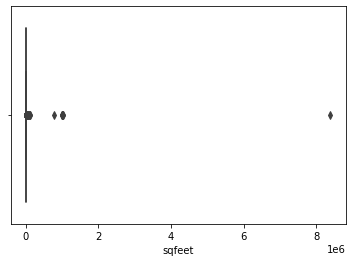

In [ ]:
# Graficamos
sns.boxplot(x="sqfeet", data=train)

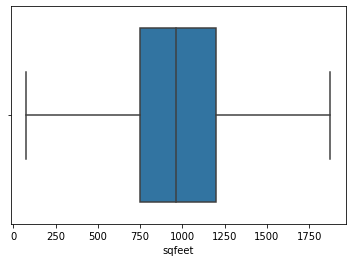

In [ ]:

# Graficamos sin outliers
sns.boxplot(x = 'sqfeet', data = train, showfliers = False)

Según las gráficas, hay una gran cantidad de valores erróneos en una columna de tamaño de viviendas en pies cuadrados. El valor mínimo de 75 pies cuadrados es muy bajo en comparación con los 200 pies cuadrados mencionados como mínimo habitable, y el valor máximo de 1.875 es inferior al promedio de tamaño de viviendas en Estados Unidos. Por lo tanto, se tomará un valor mínimo válido de 200 pies cuadrados y un valor máximo de 10,000 pies cuadrados, reemplazando los valores que excedan estos límites.

In [ ]:
train['sqfeet'].mask(train['sqfeet'] < 200, 200, inplace=True)
test['sqfeet'].mask(test['sqfeet'] < 200, 200, inplace=True)

In [ ]:
train['sqfeet'].mask(train['sqfeet'] > 10000, 10000, inplace=True)
test['sqfeet'].mask(test['sqfeet'] > 10000, 10000, inplace=True)

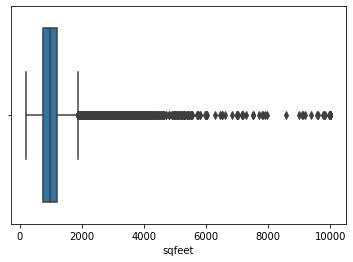

In [ ]:
#Volvemos a graficar
sns.boxplot(x="sqfeet", data=train)

Como vemos en la grfica a pesar de la presencia de outliers en los datos recolectados, estos se relacionan satisfactoriamente con la cantidad de propiedades en alquiler por debajo del tamaño promedio en Estados Unidos y una menor cantidad de propiedades con tamaños muy superiores a la media.

Este script agrega una nueva columna llamada "publicaciones" al dataframe "train" que indica cuántas veces aparece cada valor de la columna "image_url" en el dataframe. Sin embargo, se considera que hay valores muy superiores a la media, por lo que se establece como máximo 30 publicaciones y se espera que el set de testeo no tenga tantas repeticiones.

In [ ]:
train['publicaciones'].mask(train['publicaciones'] > 30, 30, inplace=True)
test['publicaciones'].mask(test['publicaciones'] > 30, 30, inplace=True)

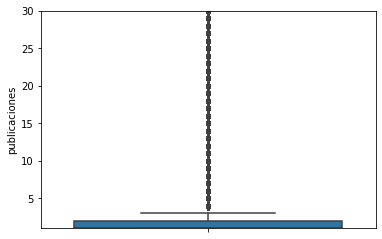

In [ ]:
# Graficamos
sns.boxplot( y=train["publicaciones"] )
plt.ylim(1, 30)
plt.show()


Observamos las columnas de camas y baños, que parecen tener outliers

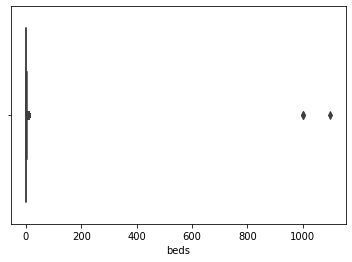

In [ ]:
# Graficamos camas
sns.boxplot(x="beds", data=train)

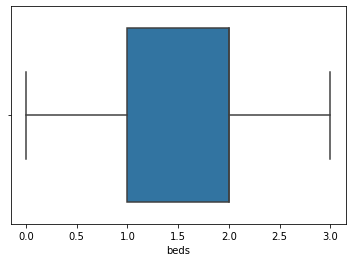

In [ ]:
# Ahora sin outliers
sns.boxplot(x = 'beds', data = train, showfliers = False)

Reemplazaremos los valores en 0 por 1 y los valores mayores a 8 por 8.

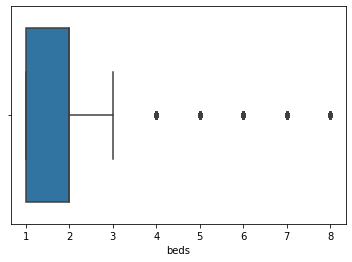

In [ ]:
train['beds'].mask(train['beds'] == 0, 1, inplace=True)
train['beds'].mask(train['beds'] > 8, 8, inplace=True)
test['beds'].mask(test['beds'] == 0, 1, inplace=True)
test['beds'].mask(test['beds'] > 8, 8, inplace=True)
sns.boxplot(x="beds", data=train)

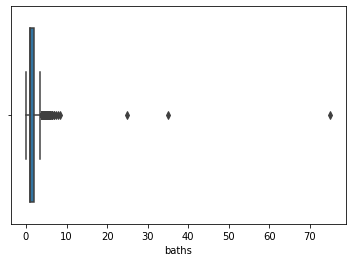

In [ ]:
# Graficamos baños
sns.boxplot(x="baths", data=train)

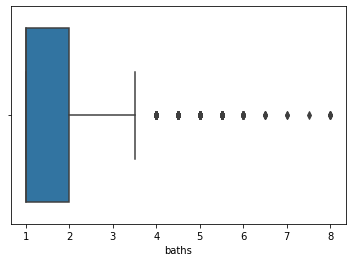

In [ ]:
train['baths'].mask(train['baths'] == 0, 1, inplace=True)
train['baths'].mask(train['baths'] > 8, 8, inplace=True)
test['baths'].mask(test['baths'] == 0, 1, inplace=True)
test['baths'].mask(test['baths'] > 8, 8, inplace=True)
sns.boxplot(x='baths', data=train)

El script hace una revisión de la columna de longitud en un dataframe, donde se encuentran valores incorrectos en positivo correspondientes a la ubicación de Arkansas. La solución propuesta es cambiar el signo a los valores en positivo y fijar un límite máximo de -67.482.

In [ ]:
train["long"] = train["long"].abs()*(-1)
test["long"] = test["long"].abs()*(-1)

In [ ]:
train['long'].mask(train['long'] > (-67.482), (-67.482), inplace=True)
test['long'].mask(test['long'] > (-67.482), (-67.482), inplace=True)

In [ ]:
# Revisamos existencia de valores nulos
train["long"].isnull().sum()

912

In [ ]:
# Reemplazamos nulos por el promedio
train['long'].fillna(int(train['long'].mean()), inplace=True)
test['long'].fillna(int(test['long'].mean()), inplace=True)

Revisamos la columna de Servicio de Lavanderia. Vemos las opciones que contiene.

In [ ]:
train["laundry_options"].unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', None,
       'laundry in bldg', 'no laundry on site'], dtype=object)

In [ ]:
train.laundry_options.isnull().sum()

33194

Vemos que la cantidad de valores nulos es importante. Asumiremos que corresponden a que el inmueble no tiene el servicio

In [ ]:
train["laundry_options"].fillna("no laundry on site", inplace = True)
test["laundry_options"].fillna("no laundry on site", inplace = True)
train.laundry_options.isnull().sum()

0

Convertimos la variable categorica en numérica. Lo hacemos de manera manual para ordenar los valores de acuerdo a la existencia o no del servicio

In [ ]:
numeric_var = {'laundry_options': {'no laundry on site':0, 'w/d hookups':1, 'laundry on site':2, 'laundry in bldg':3, "w/d in unit":4}}
train = train.replace(numeric_var)
test = test.replace(numeric_var)

Revisamos la columna de Estacionamiento. Vemos las opciones que contiene

In [ ]:
train["parking_options"].unique()

array(['detached garage', 'carport', 'off-street parking', None,
       'attached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [ ]:
train.parking_options.isnull().sum()

55511

Nuevamente, no podremos eliminar los nulos, y asumimos que corresponde a propiedad sin estacionamiento. Reemplazamos los nulos y luego convertigos a valores numéricos, agrupando algunas categorias similares

In [ ]:
train["parking_options"].fillna("no parking", inplace = True)
test["parking_options"].fillna("no parking", inplace = True)
train.parking_options.isnull().sum()

0

In [ ]:
numeric_var = {'parking_options': {'no parking':0, 'street parking':0, 'off-street parking':1, 'carport':2, "detached garage":2, "attached garage":3, "valet parking":4}}
train = train.replace(numeric_var)
test = test.replace(numeric_var)

Revisaremos ahora la correlación de longitud y latitud con el valor del alquiler para evaluar si eliminamos alguna de ellas o ambas

In [ ]:
correlaciones = train[["lat","long","category_price"]].copy()
correlaciones.corr()

,lat,long,category_price
lat,1.000000,-0.107957,-0.020614
long,-0.107957,1.000000,0.171137
category_price,-0.020614,0.171137,1.000000


La columna de longitud tiene una alta correlación con el precio y se cree que esto se debe a que los valores cercanos al mar son más valiosos en los EEUU. Por lo tanto, se decidirá mantener la columna de longitud en el modelo y eliminar otras columnas como "latitud", "price", "id", "url", "region", "region_url", "image_url" y "description" ya que se consideran que no aportan valor o representan una gran dificultad para ser incorporadas en el modelo.

In [ ]:
train.drop(["id","lat","url", "region", "region_url", "image_url","description","price"],axis = 1, inplace = True)
test.drop(["id","lat","url", "region", "region_url", "image_url","description"],axis = 1, inplace = True)

Revisemos las correlaciones del estado actual del dataframe para eliminar algunas columnas adicionales que en principio no serían de utilidad

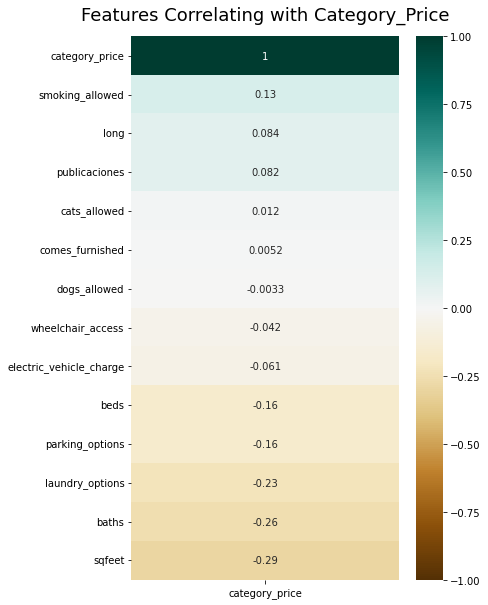

In [ ]:
# Graficamos
plt.figure(figsize=(6, 10))
heatmap = sns.heatmap(train.corr(method='spearman')[['category_price']].sort_values(by='category_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Category_Price', fontdict={'fontsize':18}, pad=16);

De acuerdo al gráfico, en un primer modelo usaremos beds, baths, parking options, laundry options, sqfeet, publicaciones, long y si se permite fumar

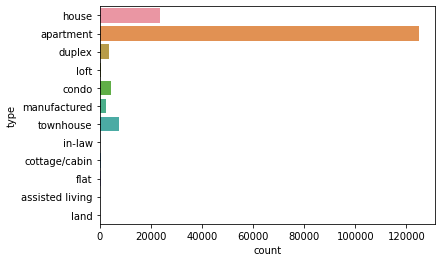

In [ ]:
# Vemos la distribución de la columna "type"
sns.countplot(y='type', data=train)

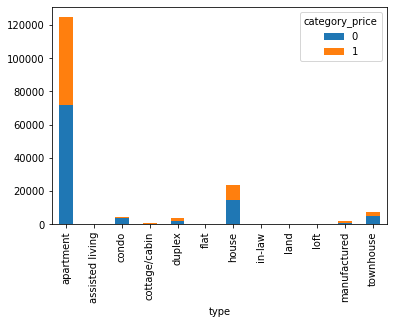

In [ ]:
# Veamos la relación entre el precio del alquiler y el tipo de vivienda
agr = train.groupby(['type', 'category_price']).size().reset_index().pivot(columns='category_price', index='type', values=0)
agr.plot(kind='bar', stacked=True)

Notamos que en las casas, condominios y townhouses la proporcion de alquileres mayores a $999 es mayor, por lo que en principio dejariamos esta columna. Transformamos a valores numéricos.

In [ ]:
numeric_var = {'type': {'land':0, 'in-law':0, 'assisted living':1, 'manufactured':1, "apartment":2, "flat":3, "townhouse":3, "loft":4 ,"duplex":4, "house":3, "cottage/cabin":4, "condo":5}}
train = train.replace(numeric_var)
test = test.replace(numeric_var)

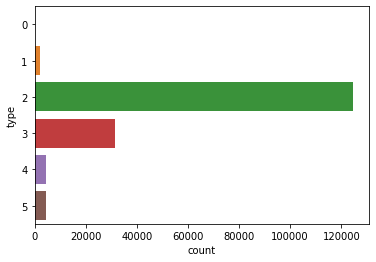

In [ ]:
# Graficamos las nuevas categorias
sns.countplot(y='type', data=train)

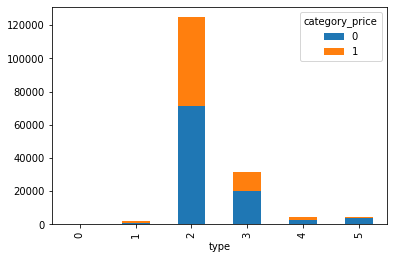

In [ ]:
agr = train.groupby(['type', 'category_price']).size().reset_index().pivot(columns='category_price', index='type', values=0)
agr.plot(kind='bar', stacked=True)

La columna "state" será utilizada en el modelo debido a la gran influencia del estado en el precio promedio de las propiedades. La columna será transformada en valores numéricos mediante el método de Binary Encoding, ya que el One-Hot Encoding generaría demasiadas columnas adicionales.

In [ ]:
#! pip install --upgrade category_encoders
import category_encoders as ce

In [ ]:
#Usa codificación binaria para convertir las variables categóricas en variables numéricas. Utiliza la librería "category_encoders" para codificar la columna "state" y crea nuevos dataframes "train_binary" y "test_binary" con las columnas codificadas. 
train_ce = train.copy()
test_ce = test.copy()

encoder = ce.BinaryEncoder(cols=['state'])
train_binary = encoder.fit_transform(train_ce)
test_binary = encoder.fit_transform(test_ce)

train_binary.head()

,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,parking_options,long,state_0,state_1,state_2,state_3,state_4,state_5,category_price,publicaciones
0,3,1200,2,2.0,1,1,1,0,0,0,...,2,-116.2250,0,0,0,0,0,1,0,1
1,2,694,1,1.0,1,1,1,0,0,0,...,2,-104.7800,0,0,0,0,1,0,0,2
2,2,900,2,2.0,0,0,1,0,0,0,...,1,-76.1643,0,0,0,0,1,1,0,1
3,3,1469,3,2.0,1,1,1,0,0,0,...,0,-112.0560,0,0,0,1,0,0,0,1
4,2,700,1,1.0,1,1,1,0,0,0,...,2,-86.6592,0,0,0,1,0,1,1,4


In [ ]:
test_binary.head()


,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,long,state_0,state_1,state_2,state_3,state_4,state_5,publicaciones
0,1,1344,3,2.0,0,0,1,0,0,0,4,1,-83.5763,0,0,0,0,0,1,3
1,2,1050,2,1.0,0,0,1,0,0,0,1,1,-72.5538,0,0,0,0,1,0,1
2,2,1150,2,2.0,1,1,1,1,0,0,4,2,-83.7712,0,0,0,0,0,1,2
3,2,1280,2,2.5,1,1,0,0,0,0,4,3,-105.0350,0,0,0,0,1,1,1
4,2,783,2,1.0,1,1,1,0,0,0,2,0,-78.5611,0,0,0,1,0,0,2


In [ ]:
# Generamos un dataframe para hacer las primeras pruebas
train_v1 = train_binary
test_v1 = test_binary

In [ ]:
X = train_v1.drop(["cats_allowed","dogs_allowed","wheelchair_access", "electric_vehicle_charge", "comes_furnished", "category_price"],axis = 1)

In [ ]:
y = train_v1["category_price"]

In [ ]:
train_v1.columns

Index(['type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'laundry_options', 'parking_options', 'long',
       'state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5',
       'category_price', 'publicaciones'],
      dtype='object')

In [ ]:
test_v1.columns

Index(['type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'laundry_options', 'parking_options', 'long',
       'state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5',
       'publicaciones'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from IPython.display import clear_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

#Comenzaremos testeando un modelo de árbol de decisión
El objetivo es evaluar la precisión de un modelo de árbol de decisión con diferentes profundidades del árbol (de 1 a 50).

In [ ]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


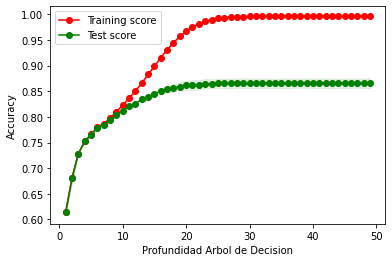

In [ ]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()


De acuerdo a la gráfica de las sucesivas pruebas, tomaremos como 27 la profundidad ideal del Árbol

In [ ]:
# Iniciamos un modelo con profundidad 27
clf = DecisionTreeClassifier(max_depth = 27, random_state = 42)

In [ ]:
# Separamos el set de entrenamiento de Henry en dos partes para entrenar
# y testear
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=42, stratify=train_v1['category_price'])

In [ ]:
# Entrenamos el modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=27, random_state=42)

In [ ]:
# Verificamos la precisión del modelo
print('Precisión en el set de entrenamiento: {0: .2f}'.format(clf.score(X_train, y_train)))
print('Precisión en el set de testeo: {0: .2f}'.format(clf.score(X_test, y_test)))

Precisión en el set de entrenamiento:  0.99
Precisión en el set de testeo:  0.87


In [ ]:
# Realizamos las predicciones
X_test = test_v1.drop(["cats_allowed","dogs_allowed","wheelchair_access", "electric_vehicle_charge", "comes_furnished"],axis = 1)
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Generamos el archivo con las predicciones para enviar a Henry
pd.DataFrame(y_pred).to_csv('JassonLr.csv', index=False, header = False)

Primera prueba

In [ ]:
clf = DecisionTreeClassifier(max_depth = 10, random_state = 42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=42, stratify=train_v1['category_price'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=42, stratify=train_v1['category_price'])

In [ ]:
# Entrenamos el modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
# Verificamos la precisión del modelo
print('Precisión en el set de entrenamiento: {0: .2f}'.format(clf.score(X_train, y_train)))
print('Precisión en el set de testeo: {0: .2f}'.format(clf.score(X_test, y_test)))

Precisión en el set de entrenamiento:  0.82
Precisión en el set de testeo:  0.82


In [ ]:
# Realizamos las predicciones
X_test = test_v1.drop(["cats_allowed","dogs_allowed","wheelchair_access", "electric_vehicle_charge", "comes_furnished"],axis = 1)
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
# Generamos el archivo con las predicciones para enviar a Henry
pd.DataFrame(y_pred).to_csv('01_JassonLr.csv', index=False, header = False)